In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pandas as pd
from scipy.optimize import leastsq as lsq
from numpy.polynomial import chebyshev

In [2]:
# taken from the sorted calibration files from LBT_Data_Analysis.ipynb
m1b_lamps = ['LBT-HAT-P-19/calibration/mods1b.20191121.0080.fits', 'LBT-HAT-P-19/calibration/mods1b.20191121.0081.fits', 'LBT-HAT-P-19/calibration/mods1b.20191121.0082.fits', 'LBT-HAT-P-19/calibration/mods1b.20191121.0083.fits', 'LBT-HAT-P-19/calibration/mods1b.20191121.0084.fits']
m2b_lamps = ['LBT-HAT-P-19/calibration/mods2b.20191121.0080.fits', 'LBT-HAT-P-19/calibration/mods2b.20191121.0081.fits', 'LBT-HAT-P-19/calibration/mods2b.20191121.0082.fits', 'LBT-HAT-P-19/calibration/mods2b.20191121.0083.fits', 'LBT-HAT-P-19/calibration/mods2b.20191121.0084.fits']
m1r_lamps = ['LBT-HAT-P-19/calibration/mods1r.20191121.0165.fits', 'LBT-HAT-P-19/calibration/mods1r.20191121.0166.fits', 'LBT-HAT-P-19/calibration/mods1r.20191121.0167.fits', 'LBT-HAT-P-19/calibration/mods1r.20191121.0168.fits', 'LBT-HAT-P-19/calibration/mods1r.20191121.0169.fits']
m2r_lamps = ['LBT-HAT-P-19/calibration/mods2r.20191121.0143.fits', 'LBT-HAT-P-19/calibration/mods2r.20191121.0144.fits', 'LBT-HAT-P-19/calibration/mods2r.20191121.0145.fits', 'LBT-HAT-P-19/calibration/mods2r.20191121.0146.fits', 'LBT-HAT-P-19/calibration/mods2r.20191121.0147.fits']

In [3]:
def lamp_median(files):
    data_files = []
    for i in files:
        data, header = fits.getdata(i, header=True)
        print(header["OBJECT"])
        data_files.append(data)
    
    data_use = np.median(data_files, axis = 0)
    return data_use

In [4]:
m1b_median = lamp_median(m1b_lamps)

Ne + Hg[Ar] Lamps
Ne + Hg[Ar] Lamps
Ne + Hg[Ar] Lamps
Kr + Xe Lamps
Ar Lamp


In [5]:
# decide not to do median, instead do lamp by lamp
data, header = fits.getdata(m1r_lamps[0], header=True)
data2, header2 = fits.getdata(m1r_lamps[3], header=True)
data3, header3 = fits.getdata(m1r_lamps[4], header=True)
print(header["Object"])
print(header2["Object"])
print(header3["Object"])
upper = data[:][:int(len(data)/2)]
lower = data[:][int(len(data)/2):]
lower2 = data2[:][int(len(data2)/2):]
lower3 = data3[:][int(len(data3)/2):]
sum_upper = np.sum(upper, axis = 0)
sum_lower = np.sum(lower, axis = 0)
sum_lower2 = np.sum(lower2, axis = 0)
sum_lower3 = np.sum(lower3, axis = 0)
upper2 = data2[:][:int(len(data)/2)]
sum_upper2 = np.sum(upper2, axis = 0)

Ne + Hg[Ar] Lamps
Kr + Xe Lamps
Ar Lamp


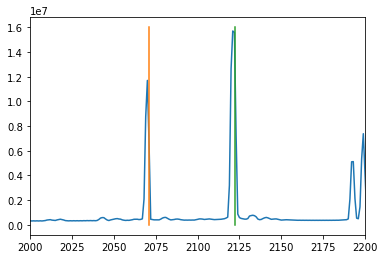

In [6]:
#plt.plot(sum_upper)
#plt.plot(sum_lower[2000:2200])
#plt.plot(sum_lower2[2000:2200])
plt.plot(sum_lower3[::])
plt.plot([2070.83,2070.83],[0,1.6*1e7])
plt.plot([2122.23,2122.23],[0,1.6*1e7])
plt.xlim(2000,2200)
plt.show()

Best-fit parameters: [  0.80705523   4.93412034   0.96161459 100.02107518]


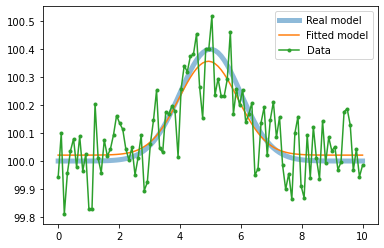

In [7]:
# gaussian fitting code - from Néstor
def gaussian(x, mu, sigma):
    norm = 1.0 / (np.sqrt( 2. * np.pi) * sigma)
    # If negative sigma, you get back nonesense:
    offset = 0.
    if sigma < 0:
        offset = 1e32
    return norm * np.exp( -0.5 * ((x - mu)**2) / sigma**2 ) + offset
def fit_gaussian(p0, xdata, ydata):
    # Define gaussian function (four parameters: p[0] is amplitude, 
    # p[1] mean, p[2] sigma, p[3] offset):
    model = lambda p, x: p[0] * gaussian(x, p[1], p[2]) + p[3]
    # Define error function:
    error_function = lambda p, x, y: model(p, x) - y
    # Least-square-it!
    lsq_parameters, out = lsq(error_function, p0, \
                                                 args = (xdata, ydata))
    return lsq_parameters
# Define parameters of the gaussian:
amplitude, offset, mu, sigma = 1., 100, 5., 1.0
# Number of points to simulate:
ndata = 100
# Let's define some data:
xdata = np.linspace(0.,10.,ndata)
simulated_model = offset + amplitude*gaussian(xdata, mu, sigma)
# Make some noise!
ydata = simulated_model + np.random.normal(0.,0.1, ndata)
# Let's fit it. First, define initial set of parameters --- we offset them a bit:
p0 = [0.5, mu + 3., sigma + 0.5, offset + 50.]
lsq_parameters = fit_gaussian(p0, xdata, ydata)
print('Best-fit parameters:', lsq_parameters)
# Evaluate the fitted model:
prediction = lsq_parameters[0] * gaussian(xdata, lsq_parameters[1],\
                                          lsq_parameters[2]) + lsq_parameters[3]
plt.plot(xdata, simulated_model, '-', alpha = 0.5, lw=5, label = 'Real model')
plt.plot(xdata, prediction, '-', label = 'Fitted model')
plt.plot(xdata, ydata, '.-', label = 'Data')
plt.legend()
plt.show()

In [8]:
# fit gaussian by putting it in the middle of the vals (lower should be approx. 10 pixels below peak)
lower = 2056
vals = sum_upper[lower:lower+20]
lsq_parameters = fit_gaussian(p0, np.linspace(1,20,20), vals)
print('Best-fit parameters:', lsq_parameters)

Best-fit parameters: [1.71686692e+06 1.60290888e+01 7.50581106e-01 2.69980404e+05]


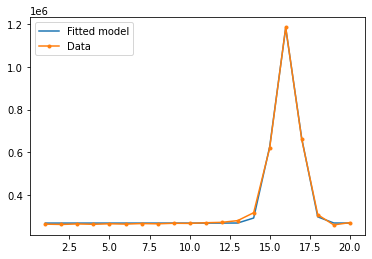

In [9]:
prediction = lsq_parameters[0] * gaussian(np.linspace(1,20,20), lsq_parameters[1],\
                                          lsq_parameters[2]) + lsq_parameters[3]
#plt.plot(np.linspace(0,20,1), simulated_model, '-', alpha = 0.5, lw=5, label = 'Real model')
plt.plot(np.linspace(1,20,20), prediction, '-', label = 'Fitted model')
plt.plot(np.linspace(1,20,20), vals, '.-', label = 'Data')
plt.legend()
plt.show()

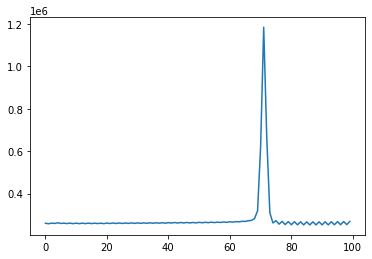

In [10]:
plt.plot(sum_upper[2000:2100])
#plt.ylim(0.2e6,450000*10)
plt.show()

In [11]:
m1b_0_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_0_pix_u = [1320+1.11787086e+01, 1336+7.96764669e+00,1710+7.47431737e+00,1740+7.87814140e+00, 2010+1.03037735e+01,2550+9.90131300e+00, 3080+8.79944844e+00]

In [12]:
m1b_1_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_1_pix_u = [1320+1.11791894e+01, 1336+7.96187749e+00,1710+7.47248815e+00,1740+7.87619803e+00, 2010+1.03034588e+01,2550+9.90241836e+00, 3080+8.79338032e+00]

In [13]:
m1b_2_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_2_pix_u = [1320+1.11778367e+01, 1336+7.95892787e+00,1710+7.46887292e+00,1740+7.86855901e+00, 2010+1.02986392e+01,2550+9.88577462e+00, 3080+8.78948464e+00]

In [14]:
#m1b_3_wave_u = [4273.96943, 4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618]
#m1b_3_pix_u = [1850+1.01386574e+01, 1970+1.23919424e+01, 2025+1.23970841e+01, 2115+6.30285000e+00, 2150+8.48926841e+00, 2270+6.94850744e+00, 2310+1.24660561e+01, 2340+7.44452100e+00, 2375+8.43746551e+00, 2445+9.05086419e+00, 2480+9.22109345e+00, 3185+1.01674793e+01, 3260+1.24062165e+01]
m1b_3_wave_u = [4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618] # took out first point
m1b_3_pix_u = [1970+1.23919424e+01, 2025+1.23970841e+01, 2115+6.30285000e+00, 2150+8.48926841e+00, 2270+6.94850744e+00, 2310+1.24660561e+01, 2340+7.44452100e+00, 2375+8.43746551e+00, 2445+9.05086419e+00, 2480+9.22109345e+00, 3185+1.01674793e+01, 3260+1.24062165e+01]

In [15]:
m1b_4_wave_u = [3948.97, 4044.418, 4158.590, 4200.674, 4251.185, 4259.362, 4272.169, 4300.101, 4333.561, 4345.168, 4510.733, 4522.323, 5162.285, 5187.746, 5495.874, 5558.702, 5606.733, 5650.704]
m1b_4_pix_u = [1610+1.22518362e+01, 1705+1.03678039e+01, 1815+1.12443084e+01, 1857+9.77384532e+00, 1902+1.41763204e+01, 1910+1.40854859e+01, 1925+1.15022408e+01, 1955+8.61573431e+00, 1985+1.14513029e+01, 2000+7.37488504e+00, 2155+1.18828850e+01, 2170+8.12707098e+00, 2790+8.55197848e+00, 2815+8.26038742e+00, 3112+1.07319397e+01, 3175+8.96052504e+00, 3220+1.06863397e+01, 3260+1.34277430e+01]

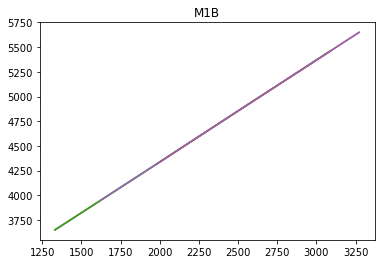

In [16]:
plt.title("M1B")
plt.plot(m1b_0_pix_u,m1b_0_wave_u)
plt.plot(m1b_1_pix_u,m1b_1_wave_u)
plt.plot(m1b_2_pix_u,m1b_2_wave_u)
plt.plot(m1b_3_pix_u,m1b_3_wave_u)
plt.plot(m1b_4_pix_u,m1b_4_wave_u)

In [17]:
m2b_0_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_0_pix_u = [1320-40+1.16191330e+01, 1336-40+8.35422382e+00, 1710-40+6.62559688e+00, 1740-40+6.93964403e+00, 2010-40+8.41988379e+00, 2510+6.35118275e+00, 3078-40+5.28118061e+00]

In [18]:
m2b_1_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_1_pix_u = [1320-40+1.16226007e+01, 1336-40+8.35637553e+00, 1710-40+6.62893050e+00, 1740-40+6.94401294e+00, 2010-40+8.42466422e+00, 2510+6.35550437e+00, 3078-40+5.28429987e+00]

In [19]:
m2b_2_wave_u = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_2_pix_u = [1320-40+1.16238695e+01, 1336-40+8.35489079e+00, 1710-40+6.62828314e+00, 1740-40+6.94229934e+00, 2010-40+8.42378229e+00, 2510+6.34830803e+00, 3078-40+5.28317361e+00]

In [20]:
#m2b_3_wave_u = [4273.96943, 4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618]
#m2b_3_pix_u = [1850-40+9.14215580e+00, 1970-40+1.09858831e+01, 2025-40+1.07677901e+01, 2112-40+7.42633830e+00, 2150-40+6.50430029e+00, 2268-40+6.55359053e+00, 2310-40+9.88552216e+00, 2338-40+6.79613606e+0, 2375-40+5.66068800e+00, 2445-40+6.04761657e+00, 2480-40+6.10473528e+00, 3182-40+7.59285749e+00, 3260-40+6.66760338e+00]
m2b_3_wave_u = [ 4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618] # took out first point
m2b_3_pix_u = [1970-40+1.09858831e+01, 2025-40+1.07677901e+01, 2112-40+7.42633830e+00, 2150-40+6.50430029e+00, 2268-40+6.55359053e+00, 2310-40+9.88552216e+00, 2338-40+6.79613606e+0, 2375-40+5.66068800e+00, 2445-40+6.04761657e+00, 2480-40+6.10473528e+00, 3182-40+7.59285749e+00, 3260-40+6.66760338e+00]

In [21]:
m2b_4_wave_u = [3948.97, 4044.418, 4158.590, 4200.674, 4251.185, 4259.362, 4272.169, 4300.101, 4333.561, 4345.168, 4510.733, 4522.323, 5162.285, 5187.746, 5495.874, 5558.702, 5606.733, 5650.704]
m2b_4_pix_u = [1610-40+1.20550584e+01, 1705-40+9.81870540e+00, 1815-40+1.03713367e+01, 1857-40+8.75347611e+00, 1901-40+1.39608054e+01, 1909-40+1.38471267e+01, 1925-40+1.02845540e+01, 1955-40+7.28542041e+00, 1985-40+9.97648815e+00, 2000-40+5.84235148e+00, 2155-40+9.86192790e+00, 2170-40+6.07943129e+00, 2788-40+6.39146977e+00, 2812-40+7.00279838e+00, 3112-40+5.41838679e+00, 3172-40+6.45826648e+00, 3218-40+7.05375600e+00, 3260-40+7.71605230e+00]

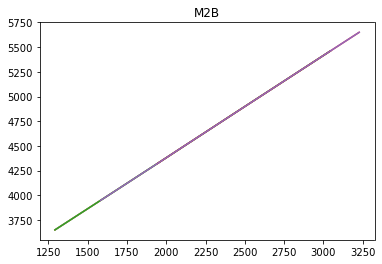

In [22]:
plt.title("M2B")
plt.plot(m2b_0_pix_u,m2b_0_wave_u)
plt.plot(m2b_1_pix_u,m2b_1_wave_u)
plt.plot(m2b_2_pix_u,m2b_2_wave_u)
plt.plot(m2b_3_pix_u,m2b_3_wave_u)
plt.plot(m2b_4_pix_u,m2b_4_wave_u)

In [23]:
#m1r_3_wave_u = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933,8908.73, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916]
#m1r_3_pix_u = [835+1.27148177e+01,865+1.11025467e+01,1210+1.43971064e+01,1285+8.59245635e+00, 1355+7.43333490e+00, 1415+1.19009931e+01, 1445+7.05574685e+00, 1600+9.95784755e+00, 1660+8.68300881e+00, 1720+1.41524367e+01, 1785+1.28449473e+01, 1830+1.33156080e+01, 1865+9.77975206e+00, 1985+1.04782740e+01, 2130+1.38988211e+01, 2145+7.23596362e+00, 3160+1.14851322e+01]
m1r_3_wave_u = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # took out 8908
m1r_3_pix_u = [765+9.49248480e+00,835+1.27148177e+01,1210+1.43971064e+01,1285+8.59245635e+00, 1355+7.43333490e+00, 1445+7.05574685e+00, 1600+9.95784755e+00, 1660+8.68300881e+00, 1720+1.41524367e+01, 1785+1.28449473e+01, 1830+1.33156080e+01, 1865+9.77975206e+00, 1985+1.04782740e+01, 2130+1.38988211e+01, 2145+7.23596362e+00, 3160+1.14851322e+01]

In [24]:
m1r_4_wave_u = [9657.786, 9224.499, 9122.967, 8667.944, 8521.442, 8264.522, 7948.176, 7724.207, 7635.106, 7383.980, 7272.936, 7147.042, 7067.218, 6965.431]
m1r_4_pix_u = [920+1.17435690e+01,1180+7.88721250e+00, 1240+7.82552105e+00, 1510+6.17176885e+00, 1590+1.25153075e+01, 1740+1.39375733e+01, 1930+1.03863498e+01, 2060+1.20233985e+01, 2110+1.38943782e+01, 2260+1.23372912e+01, 2330+7.95910067e+00, 2400+1.23968763e+01, 2450+9.63065868e+00, 2512+7.91149500e+00]

In [25]:
m1r_0_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m1r_0_pix_u = [1440+9.30931769e+00, 1610+7.92989028e+00, 1680+7.34753014e+00, 1720+1.28306152e+01 ,2230+9.94157728e+00, 2340+1.44106683e+01, 2390+6.53878434e+00, 2470+1.01130096e+01, 2530+1.12463557e+01, 2660+7.21388955e+00, 2680+1.02282093e+01, 2730+7.33488848e+00, 2780+1.22764289e+01, 2844+1.03173924e+01, 2885+9.70421416e+00, 2925+1.01724827e+01, 2955+9.52049487e+00, 3000+8.80448323e+00, 3025+1.18039568e+01, 3070+6.31923927e+00, 3120+7.24529827e+00, 3170+1.25254459e+01]

In [26]:
m1r_1_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m1r_1_pix_u = [1440+9.30940439e+00, 1610+7.92989028e+00, 1680+7.93023557e+00, 1720+1.28316116e+01 ,2230+9.94229254e+00, 2340+1.44112402e+01, 2390+6.53926942e+00, 2470+1.00981195e+01, 2530+1.12476443e+01, 2660+7.21474942e+00, 2680+1.02286696e+01, 2730+7.33542808e+00, 2780+1.22767310e+01, 2844+1.03183029e+01, 2885+9.70517749e+00, 2925+1.01732649e+01, 2955+9.52245488e+00, 3000+8.80504089e+00, 3025+1.18047817e+01, 3070+6.32156192e+00, 3120+7.24582773e+00, 3170+1.25267960e+01]

In [27]:
m1r_2_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m1r_2_pix_u = [1440+9.31273899e+00, 1610+7.93035402e+00, 1680+7.34727023e+00, 1720+1.28304806e+01 ,2230+9.94076693e+00, 2340+1.44088613e+01, 2390+6.53784444e+00, 2470+1.00798916e+01, 2530+1.12459184e+01, 2660+7.21343642e+00, 2680+1.02273204e+01, 2730+7.33434451e+00, 2780+1.22756045e+01, 2844+1.03164489e+01, 2885+9.70360732e+00, 2925+1.01723563e+01, 2955+9.52078483e+00, 3000+8.80357583e+00, 3025+1.18040810e+01, 3070+6.32044554e+00, 3120+7.24475213e+00, 3170+1.25262402e+01]

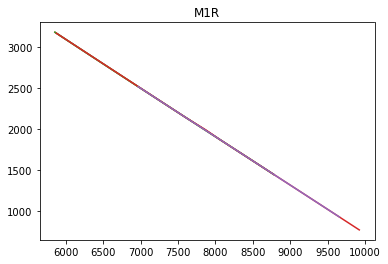

In [28]:
plt.title("M1R")
plt.plot(m1r_0_wave_u, m1r_0_pix_u)
plt.plot(m1r_1_wave_u, m1r_1_pix_u)
plt.plot(m1r_2_wave_u, m1r_2_pix_u)
plt.plot(m1r_3_wave_u, m1r_3_pix_u)
plt.plot(m1r_4_wave_u, m1r_4_pix_u)

In [29]:
#m1r_0_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
#m1r_0_pix_u = [1440+9.31273899e+00, 1610+7.93035402e+00, 1680+7.34727023e+00, 1720+1.28304806e+01 ,2230+9.94076693e+00, 2340+1.44088613e+01, 2390+6.53784444e+00, 2470+1.00798916e+01, 2530+1.12459184e+01, 2660+7.21343642e+00, 2680+1.02273204e+01, 2730+7.33434451e+00, 2780+1.22756045e+01, 2844+1.03164489e+01, 2885+9.70360732e+00, 2925+1.01723563e+01, 2955+9.52078483e+00, 3000+8.80357583e+00, 3025+1.18040810e+01, 3070+6.32044554e+00, 3120+7.24475213e+00, 3170+1.25262402e+01]
m2r_0_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m2r_0_pix_u = [1440-90+8.97620980e+00, 1610-90+7.56161448e+00, 1680-90+7.03625654e+00, 1720-90+1.25335619e+01 ,2230-90+9.59628196e+00, 2340-90+1.40102857e+01, 2390-90+6.15127645e+00, 2470-90+9.74873858e+00, 2530-90+1.06813633e+01, 2660-90+6.53265026e+00, 2680-90+9.52003323e+00, 2730-90+6.56033295e+00, 2780-90+1.14482677e+01, 2844-90+9.41983196e+00, 2885-90+8.66615276e+00, 2925-90+9.12624708e+00, 2955-90+8.42142146e+00, 3000-90+7.57848451e+00, 3025-90+1.05374275e+01, 3065-90+1.00024688e+01, 3120-90+5.79957227e+00, 3170-90+1.09821458e+01]

In [30]:
m2r_1_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m2r_1_pix_u = [1440-90+8.98199382e+00, 1610-90+7.56582025e+00, 1680-90+7.04260322e+00, 1720-90+1.25374520e+01 ,2230-90+9.60116027e+00, 2340-90+1.40116962e+01, 2390-90+6.15729598e+00, 2470-90+9.75468376e+00, 2530-90+1.06835193e+01, 2660-90+6.53656739e+00, 2680-90+9.52358397e+00, 2730-90+6.56414034e+00, 2780-90+1.14517591e+01, 2844-90+9.42195395e+00, 2885-90+8.67010781e+00, 2925-90+9.13105290e+00, 2955-90+8.42460223e+00, 3000-90+7.58150461e+00, 3025-90+1.05403346e+01, 3065-90+1.00061665e+01, 3120-90+5.80344431e+00, 3170-90+1.09857263e+01]

In [31]:
m2r_2_wave_u = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m2r_2_pix_u = [1440-90+8.98114963e+00, 1610-90+7.56380212e+00, 1680-90+7.03855562e+00, 1720-90+1.25345428e+01 ,2230-90+9.59853260e+00, 2340-90+1.40110102e+01, 2390-90+6.15511491e+00, 2470-90+9.75377020e+00, 2530-90+1.06843353e+01, 2660-90+6.53476076e+00, 2680-90+9.52218840e+00, 2730-90+6.56254681e+00, 2780-90+1.14507638e+01, 2844-90+9.42164421e+00, 2885-90+8.66816781e+00, 2925-90+9.12944817e+00, 2955-90+8.42442975e+00, 3000-90+7.57996363e+00, 3025-90+1.05391291e+01, 3065-90+1.00057265e+01, 3120-90+5.80175983e+00, 3170-90+1.09850735e+01]

In [32]:
#m2r_3_wave_u = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933,8908.73, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916]
#m2r_3_pix_u = [835-90+1.12980342e+01,865-90+9.76837227e+00,1210-90+1.36687448e+01,1285-90+7.93161214e+00, 1355-90+6.87388703e+00, 1415-90+1.14172508e+01, 1445-90+6.57833458e+00, 1600-90+9.59732889e+00, 1660-90+8.39649638e+00, 1720-90+1.38755938e+01, 1785-90+1.25785810e+01, 1830-90+1.30995648e+01, 1865-90+9.54243167e+00, 1985-90+1.02704126e+01, 2130-90+1.46828835e+01, 2146-90+6.96937601e+00, 3160-90+9.97352035e+00]
m2r_3_wave_u = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # took out 8908
m2r_3_pix_u = [670+1.29417615e+01,742+1.42980534e+01,1210-90+1.36687448e+01,1285-90+7.93161214e+00, 1355-90+6.87388703e+00, 1445-90+6.57833458e+00, 1600-90+9.59732889e+00, 1660-90+8.39649638e+00, 1720-90+1.38755938e+01, 1785-90+1.25785810e+01, 1830-90+1.30995648e+01, 1865-90+9.54243167e+00, 1985-90+1.02704126e+01, 2130-90+1.46828835e+01, 2146-90+6.96937601e+00, 3160-90+9.97352035e+00]

In [33]:
m2r_4_wave_u = [9657.786, 9224.499, 9122.967, 8667.944, 8521.442, 8264.522, 7948.176, 7724.207, 7635.106, 7383.980, 7272.936, 7147.042, 7067.218, 6965.431]
m2r_4_pix_u = [920-90+1.05134699e+01,1180-90+7.10162333e+00, 1240-90+7.12005339e+00, 1510-90+5.75458044e+00, 1590-90+1.22037843e+01, 1740-90+1.36616832e+01, 1930-90+1.02057177e+01, 2060-90+1.23283728e+01, 2110-90+1.49079348e+01, 2260-90+1.20501537e+01, 2330-90+7.60264109e+00, 2400-90+1.20241472e+01, 2450-90+9.24223546e+00, 2512-90+7.44503299e+00]

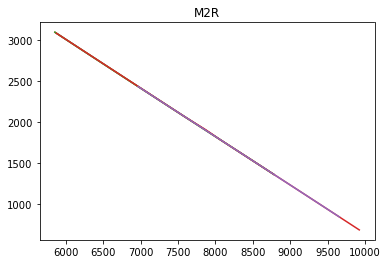

In [34]:
plt.title("M2R")
plt.plot(m2r_0_wave_u, m2r_0_pix_u)
plt.plot(m2r_1_wave_u, m2r_1_pix_u)
plt.plot(m2r_2_wave_u, m2r_2_pix_u)
plt.plot(m2r_3_wave_u, m2r_3_pix_u)
plt.plot(m2r_4_wave_u, m2r_4_pix_u)

In [35]:
m1b_0_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_0_pix_l = [1320-5+1.34371171e+01, 1336-5+8.08552889e+00,1710-5+6.92995160e+00,1740-5+4.81332189e+00, 2010+4.81332189e+00,2550-5+9.67436282e+00, 3080-5+8.68723103e+00]

In [36]:
m1b_1_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_1_pix_l = [1320-5+1.07508036e+01, 1336-5+8.08316013e+00,1710-5+6.92774651e+00,1740-5+7.36627370e+00, 2010-5+9.80755914e+00,2550-5+9.65961867e+00, 3080-5+8.68323451e+00]

In [37]:
m1b_2_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m1b_2_pix_l = [1320-5+1.36614207e+01, 1336-5+8.08406221e+00,1710-5+6.92386547e+00,1740-5+7.36210297e+00, 2010-5+9.80636753e+00,2550-5+9.66001329e+00, 3080-5+8.67963292e+00]

In [38]:
#m1b_3_wave_l = [4273.96943, 4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618]
#m1b_3_pix_l = [1850-5+9.58525340e+00, 1970-5+1.19551743e+01, 2025-5+1.19519126e+01, 2115-5+5.88152521e+00, 2150-5+8.12967047e+00, 2270-5+6.59014459e+00, 2310-5+1.21415278e+01, 2340-5+7.07884763e+00, 2375-5+8.17803211e+00, 2445-5+8.74134434e+00, 2480-5+8.91635349e+00, 3185-5+1.00216521e+01, 3260-5+1.22296554e+01]
m1b_3_wave_l = [4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618] # took out first point
m1b_3_pix_l = [1970-5+1.19551743e+01, 2025-5+1.19519126e+01, 2115-5+5.88152521e+00, 2150-5+8.12967047e+00, 2270-5+6.59014459e+00, 2310-5+1.21415278e+01, 2340-5+7.07884763e+00, 2375-5+8.17803211e+00, 2445-5+8.74134434e+00, 2480-5+8.91635349e+00, 3185-5+1.00216521e+01, 3260-5+1.22296554e+01]

In [39]:
m1b_4_wave_l = [3948.97, 4044.418, 4158.590, 4200.674, 4259.362, 4272.169, 4300.101, 4333.561, 4345.168, 4510.733, 4522.323, 5162.285, 5187.746, 5495.874, 5558.702, 5606.733, 5650.704]
m1b_4_pix_l = [1610-5+1.16787483e+01, 1705-5+9.80941775e+00, 1815-5+1.07156621e+01, 1857-5+9.29778449e+00, 1909-5+1.46028255e+01, 1925-5+1.10710472e+01, 1955-5+8.19629163e+00, 1985-5+1.09983936e+01, 2000-5+6.88567747e+00, 2155-5+1.15213431e+01, 2170-5+7.71586238e+00, 2790-5+8.35581077e+00, 2815-5+8.09885409e+00, 3112-5+1.06161553e+01, 3175-5+8.84627212e+00, 3220-5+1.05424433e+01, 3260-5+1.32806575e+01]

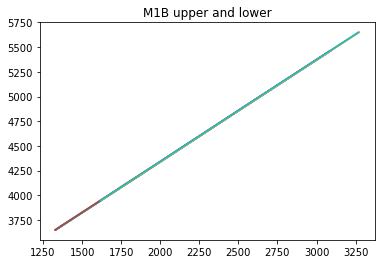

In [40]:
plt.title("M1B upper and lower")
plt.plot(m1b_0_pix_u,m1b_0_wave_u)
plt.plot(m1b_0_pix_l,m1b_0_wave_l)
plt.plot(m1b_1_pix_u,m1b_1_wave_u)
plt.plot(m1b_1_pix_l,m1b_1_wave_l)
plt.plot(m1b_2_pix_u,m1b_2_wave_u)
plt.plot(m1b_2_pix_l,m1b_2_wave_l)
plt.plot(m1b_3_pix_u,m1b_3_wave_u)
plt.plot(m1b_3_pix_l,m1b_3_wave_l)
plt.plot(m1b_4_pix_u,m1b_4_wave_u)
plt.plot(m1b_4_pix_l,m1b_4_wave_l)

In [41]:
m2b_0_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_0_pix_l = [1320-40-5+1.33913822e+01, 1336-40-5+8.47985220e+00, 1710-40-5+6.20493545e+00, 1740-40-5+6.49694071e+00, 2010-40-5+8.04174757e+00, 2510-5+6.14483523e+00, 3078-40-5+5.22669720e+00]

In [42]:
m2b_1_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_1_pix_l = [1320-40-5+1.34360642e+01, 1336-40-5+8.41453415e+00, 1710-40-5+6.20697035e+00, 1740-40-5+6.49649611e+00, 2010-40-5+8.04478295e+00, 2510-5+6.14542623e+00, 3078-40-5+5.22154946e+00]

In [43]:
m2b_2_wave_l = [3650.158,3663.284,4046.565,4077.837,4358.335,4916.608,5460.750]
m2b_2_pix_l = [1320-40-5+1.34401452e+01, 1336-40-5+8.31542002e+00, 1710-40-5+6.20557098e+00, 1740-40-5+6.49536823e+00, 2010-40-5+8.04363337e+00, 2510-5+6.14768248e+00, 3078-40-5+5.21511017e+00]

In [44]:
#m2b_3_wave_l = [4273.96943, 4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618] 
#m2b_3_pix_l = [1850-40-5+8.69438140e+00, 1970-40-5+1.05772775e+01, 2025-40-5+1.04425337e+01, 2112-40-5+7.08694998e+00, 2150-40-5+6.21422328e+00, 2268-40-5+6.29860395e+00, 2310-40-5+9.58844917e+00, 2338-40-5+6.47056851e+00, 2375-40-5+5.44592859e+00, 2445-40-5+5.76929401e+00, 2480-40-5+5.83134497e+00, 3182-40-5+7.48955905e+00, 3260-40-5+6.50619171e+00]
m2b_3_wave_l = [4319.5795, 4376.12159, 4463.69, 4502.35427, 4624.2756, 4671.2258, 4697.0208, 4734.1518, 4807.0190, 4843.2934, 5570.2894, 5649.5618] # took out first point
m2b_3_pix_l = [1970-40-5+1.05772775e+01, 2025-40-5+1.04425337e+01, 2112-40-5+7.08694998e+00, 2150-40-5+6.21422328e+00, 2268-40-5+6.29860395e+00, 2310-40-5+9.58844917e+00, 2338-40-5+6.47056851e+00, 2375-40-5+5.44592859e+00, 2445-40-5+5.76929401e+00, 2480-40-5+5.83134497e+00, 3182-40-5+7.48955905e+00, 3260-40-5+6.50619171e+00]

In [45]:
m2b_4_wave_l = [3948.97, 4044.418, 4158.590, 4200.674, 4251.185, 4259.362, 4272.169, 4300.101, 4333.561, 4345.168, 4510.733, 4522.323, 5162.285, 5187.746, 5495.874, 5558.702, 5606.733, 5650.704]
m2b_4_pix_l = [1610-40-5+1.15454560e+01, 1705-40-5+9.40551086e+00, 1815-40-5+9.90701855e+00, 1857-40-5+8.37260620e+00, 1901-40-5+1.35537869e+01, 1910-40-5+1.24868615e+01, 1925-40-5+9.82607859e+00, 1955-40-5+7.14553713e+00, 1985-40-5+9.59064702e+00, 2000-40-5+5.45506004e+00, 2155-40-5+9.53060961e+00, 2170-40-5+5.69062817e+00, 2788-40-5+6.23498710e+00, 2812-40-5+6.84520748e+00, 3112-40-5+7.35004967e+00, 3172-40-5+6.35764297e+00, 3218-40-5+6.92967905e+00, 3260-40-5+7.57172695e+00]

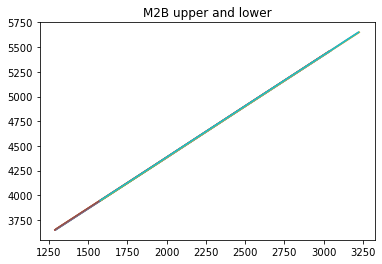

In [46]:
plt.title("M2B upper and lower")
plt.plot(m2b_0_pix_u,m2b_0_wave_u)
plt.plot(m2b_0_pix_l,m2b_0_wave_l)
plt.plot(m2b_1_pix_u,m2b_1_wave_u)
plt.plot(m2b_1_pix_l,m2b_1_wave_l)
plt.plot(m2b_2_pix_u,m2b_2_wave_u)
plt.plot(m2b_2_pix_l,m2b_2_wave_l)
plt.plot(m2b_3_pix_u,m2b_3_wave_u)
plt.plot(m2b_3_pix_l,m2b_3_wave_l)
plt.plot(m2b_4_pix_u,m2b_4_wave_u)
plt.plot(m2b_4_pix_l,m2b_4_wave_l)

In [47]:
m1r_0_wave_l = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m1r_0_pix_l = [1440+7.59080701e+00, 1610+6.15686450e+00, 1680+5.63257579e+00, 1720+1.12218233e+01 ,2230+8.23310725e+00, 2340+1.27456615e+01, 2385+9.87042620e+00, 2470+8.45091687e+00, 2530+9.59654719e+00, 2660+5.57657235e+00, 2680+8.55085469e+00, 2730+5.69102382e+00, 2780+1.06184106e+01, 2844+8.65578900e+00, 2885+8.04515591e+00, 2925+8.50996209e+00, 2955+7.84952943e+00, 3000+7.12196440e+00, 3025+1.01136405e+01, 3065+9.54089089e+00, 3120+5.56334861e+00, 3170+1.08172650e+01]

In [48]:
m1r_1_wave_l = [8780.6266,8495.3598,8377.6080, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879] # got rid of 4th
m1r_1_pix_l = [1440+7.55219923e+00, 1610+6.15838088e+00, 1680+5.63554544e+00 ,2230+8.23834696e+00, 2340+1.27470929e+01, 2385+9.87066954e+00, 2470+8.44249053e+00, 2530+9.59727676e+00, 2660+5.57798510e+00, 2680+8.55192036e+00, 2730+5.69175004e+00, 2780+1.06198927e+01, 2844+8.65677920e+00, 2885+8.04651861e+00, 2925+8.51081666e+00, 2955+7.85070440e+00, 3000+7.12318089e+00, 3025+1.01140424e+01, 3065+9.54110986e+00, 3120+5.56498303e+00, 3170+1.08175507e+01]

In [49]:
m1r_2_wave_l = [8780.6266,8495.3598,8377.6080, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879] # got rid of 4th
m1r_2_pix_l = [1440+7.55394429e+00, 1610+6.15656601e+00, 1680+5.63602553e+00 ,2230+8.23678287e+00, 2340+1.27453178e+01, 2385+9.86900029e+00, 2470+8.42291846e+00, 2530+9.59578797e+00, 2660+5.57643229e+00, 2680+8.55019124e+00, 2730+5.69019043e+00, 2780+1.06182854e+01, 2844+8.65533442e+00, 2885+8.04462031e+00, 2925+8.50932009e+00, 2955+7.84852876e+00, 3000+7.12199578e+00, 3025+1.01137386e+01, 3065+9.53915629e+00, 3120+5.56390313e+00, 3170+1.08166956e+01]

In [50]:
#m1r_3_wave_l = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933,8908.73, 8776.7505,8508.8728, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # got rid of 9th
#m1r_3_pix_l = [835+1.07901178e+01,865+9.23105637e+00,1210+1.25989928e+01,1285+6.75156521e+00, 1355+5.60523217e+00, 1415+1.00977991e+01, 1442+8.25577555e+00, 1600+8.18326946e+00, 1720+1.24023470e+01, 1785+1.10925682e+01, 1830+1.15752782e+01, 1865+8.04666786e+00, 1985+8.75244732e+00, 2130+1.21926148e+01, 2145+5.57487849e+00, 3160+9.80353831e+00]
#m1r_3_wave_l = [9923.19,9799.7,9162.6520,9045.4466, 8908.73, 8776.7505,8508.8728, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # got rid of 9th, 8928 also
#m1r_3_pix_l = [835+1.07901178e+01,865+9.23105637e+00,1210+1.25989928e+01,1285+6.75156521e+00, 1415+1.00977991e+01, 1442+8.25577555e+00, 1600+8.18326946e+00, 1720+1.24023470e+01, 1785+1.10925682e+01, 1830+1.15752782e+01, 1865+8.04666786e+00, 1985+8.75244732e+00, 2130+1.21926148e+01, 2145+5.57487849e+00, 3160+9.80353831e+00]
m1r_3_wave_l = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933, 8776.7505,8508.8728, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # got rid of 9th, 8908 also
m1r_3_pix_l = [765+7.58582604e+00,835+1.07901178e+01,1210+1.25989928e+01,1285+6.75156521e+00, 1355+5.60523217e+00, 1442+8.25577555e+00, 1600+8.18326946e+00, 1720+1.24023470e+01, 1785+1.10925682e+01, 1830+1.15752782e+01, 1865+8.04666786e+00, 1985+8.75244732e+00, 2130+1.21926148e+01, 2145+5.57487849e+00, 3160+9.80353831e+00]

In [51]:
m1r_4_wave_l = [9657.786, 9224.499, 9122.967, 8521.442, 8264.522, 7948.176, 7724.207, 7635.106, 7383.980, 7272.936, 7147.042, 7067.218, 6965.431] # got rid of 8667
m1r_4_pix_l = [920+9.87043492e+00,1180+6.09015720e+00, 1240+5.99238860e+00, 1590+1.07630720e+01, 1740+1.21770141e+01, 1930+8.72839635e+00, 2060+1.08345984e+01, 2110+1.22387042e+01, 2260+1.06957392e+01, 2330+6.26928468e+00, 2400+1.07569561e+01, 2450+7.99586818e+00, 2512+6.32321495e+00]

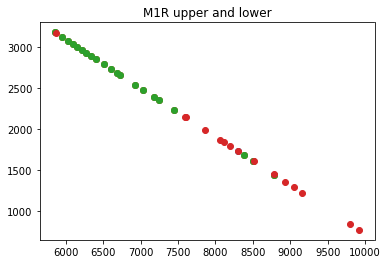

In [52]:
plt.title("M1R upper and lower")
plt.scatter(m1r_0_wave_l, m1r_0_pix_l)
plt.scatter(m1r_1_wave_l, m1r_1_pix_l)
plt.scatter(m1r_2_wave_l, m1r_2_pix_l)
plt.scatter(m1r_3_wave_l, m1r_3_pix_l)
#plt.plot(m1r_4_wave_l, m1r_4_pix_l)
#plt.plot(m1r_0_wave_u, m1r_0_pix_u)
#plt.plot(m1r_1_wave_u, m1r_1_pix_u)
#plt.plot(m1r_2_wave_u, m1r_2_pix_u)
#plt.plot(m1r_3_wave_u, m1r_3_pix_u)
#plt.plot(m1r_4_wave_u, m1r_4_pix_u)

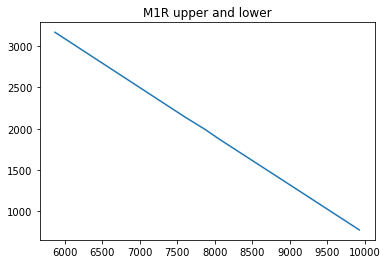

In [53]:
plt.title("M1R upper and lower")
#plt.plot(m1r_0_wave_l, m1r_0_pix_l)
#plt.plot(m1r_1_wave_l, m1r_1_pix_l)
#plt.plot(m1r_2_wave_l, m1r_2_pix_l)
plt.plot(m1r_3_wave_l, m1r_3_pix_l)
#plt.plot(m1r_4_wave_l, m1r_4_pix_l)
#plt.plot(m1r_0_wave_u, m1r_0_pix_u)
#plt.plot(m1r_1_wave_u, m1r_1_pix_u)
#plt.plot(m1r_2_wave_u, m1r_2_pix_u)
#plt.plot(m1r_3_wave_u, m1r_3_pix_u)
#plt.plot(m1r_4_wave_u, m1r_4_pix_u)

In [54]:
m2r_0_wave_l = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m2r_0_pix_l = [1440-90-5+9.10138953e+00, 1610-90-5+7.68534117e+00, 1680-90-5+7.22133982e+00, 1720-90-5+1.27457170e+01 ,2230-90-5+9.80360412e+00, 2340-90-5+1.41207284e+01, 2390-90-5+6.40232612e+00, 2470-90-5+9.33624510e+00, 2530-90-5+1.09609204e+01, 2660-90-5+6.76976004e+00, 2680-90-5+9.73917553e+00, 2730-90-5+6.79660365e+00, 2780-90-5+1.16448783e+01, 2844-90-5+9.58056099e+00, 2885-90-5+8.93167196e+00, 2925-90-5+9.41995500e+00, 2955-90-5+8.60976901e+00, 3000-90-5+7.81892147e+00, 3025-90-5+1.07561978e+01, 3065-90-5+1.02960777e+01, 3120-90-5+6.08260781e+00, 3170-90-5+1.12626241e+01]

In [55]:
m2r_1_wave_l = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879] # 7032 took out
m2r_1_pix_l = [1440-90-5+9.10511898e+00, 1610-90-5+7.68926062e+00, 1680-90-5+7.22705576e+00, 1720-90-5+1.27543772e+01 ,2230-90-5+9.80889079e+00, 2340-90-5+1.41200515e+01, 2390-90-5+6.40602554e+00, 2530-90-5+1.09661950e+01, 2660-90-5+6.77441667e+00, 2680-90-5+9.74340253e+00, 2730-90-5+6.80146636e+00, 2780-90-5+1.16489864e+01, 2844-90-5+9.58398337e+00, 2885-90-5+8.93619935e+00, 2925-90-5+9.42280869e+00, 2955-90-5+8.61271184e+00, 3000-90-5+7.82264862e+00, 3025-90-5+1.07603683e+01, 3065-90-5+1.02997502e+01, 3120-90-5+6.08636437e+00, 3170-90-5+1.12657245e+01]

In [56]:
m2r_2_wave_l = [8780.6266,8495.3598,8377.6080, 8300.3258, 7438.898, 7245.1666, 7173.9381, 7032.4131, 6929.4673, 6717.0430, 6678.2762, 6598.9529, 6506.5281, 6402.2480, 6334.4278, 6266.4950, 6217.2812, 6143.0626, 6096.1631, 6029.9969, 5944.8342, 5852.4879]
m2r_2_pix_l = [1440-90-5+9.10660245e+00, 1610-90-5+7.68784171e+00, 1680-90-5+7.22387769e+00, 1720-90-5+1.27521418e+01 ,2230-90-5+9.80696212e+00, 2340-90-5+1.41194101e+01, 2390-90-5+6.40511537e+00, 2470-90-5+9.30483166e+00, 2530-90-5+1.09650083e+01, 2660-90-5+6.77353233e+00, 2680-90-5+9.74244384e+00, 2730-90-5+6.80019778e+00, 2780-90-5+1.16475253e+01, 2844-90-5+9.58250449e+00, 2885-90-5+8.93532394e+00, 2925-90-5+9.42217088e+00, 2955-90-5+8.61234291e+00, 3000-90-5+7.82220412e+00, 3025-90-5+1.07596967e+01, 3065-90-5+1.02982499e+01, 3120-90-5+6.08553772e+00, 3170-90-5+1.12641349e+01]

In [57]:
#m2r_3_wave_l = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933,8908.73, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916]
#m2r_3_pix_l = [835-90-5+1.12829444e+01,865-90-5+9.73513714e+00,1210-90-5+1.36549030e+01,1285-90-5+7.99915087e+00, 1355-90-5+6.95820997e+00, 1415-90-5+1.14812902e+01, 1445-90-5+6.64563099e+00, 1600-90-5+9.73459019e+00, 1660-90-5+8.48949827e+00, 1720-90-5+1.40293830e+01, 1785-90-5+1.27017301e+01, 1830-90-5+1.32968004e+01, 1865-90-5+9.65983802e+00, 1985-90-5+1.04658623e+01, 2130-90-5+1.49075741e+01, 2146-90-5+7.19777866e+00, 3160-90-5+1.02568641e+01]
m2r_3_wave_l = [9923.19,9799.7,9162.6520,9045.4466, 8928.6933, 8776.7505,8508.8728,8409.191, 8298.1099, 8190.0566, 8112.9012,8059.5048, 7865.8233, 7601.5457, 7587.4136, 5870.916] # took out 8908
m2r_3_pix_l = [670+7.92640360e+00,742+9.28293944e+00,1210-90-5+1.36549030e+01,1285-90-5+7.99915087e+00, 1355-90-5+6.95820997e+00, 1445-90-5+6.64563099e+00, 1600-90-5+9.73459019e+00, 1660-90-5+8.48949827e+00, 1720-90-5+1.40293830e+01, 1785-90-5+1.27017301e+01, 1830-90-5+1.32968004e+01, 1865-90-5+9.65983802e+00, 1985-90-5+1.04658623e+01, 2130-90-5+1.49075741e+01, 2146-90-5+7.19777866e+00, 3160-90-5+1.02568641e+01]

In [58]:
m2r_4_wave_l = [9657.786, 9224.499, 9122.967, 8667.944, 8521.442, 8264.522, 7948.176, 7724.207, 7635.106, 7383.980, 7272.936, 7147.042, 7067.218, 6965.431]
m2r_4_pix_l = [920-90-5+1.05246739e+01,1180-90-5+7.16350980e+00, 1240-90-5+7.20217916e+00, 1510-90-5+5.85831839e+00, 1590-90-5+1.23466232e+01, 1740-90-5+1.38022934e+01, 1930-90-5+1.03819005e+01, 2060-90-5+1.25049101e+01, 2110-90-5+1.51119956e+01, 2260-90-5+1.23109675e+01, 2330-90-5+7.81259707e+00, 2400-90-5+1.23169065e+01, 2450-90-5+9.46780156e+00, 2512-90-5+7.61838673e+00]

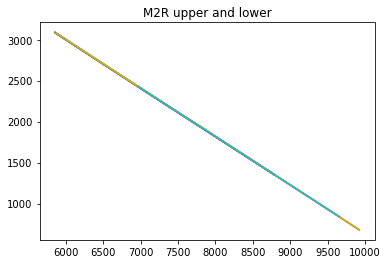

In [59]:
plt.title("M2R upper and lower")
plt.plot(m2r_0_wave_l, m2r_0_pix_l)
plt.plot(m2r_1_wave_l, m2r_1_pix_l)
plt.plot(m2r_2_wave_l, m2r_2_pix_l)
plt.plot(m2r_3_wave_l, m2r_3_pix_l)
plt.plot(m2r_4_wave_l, m2r_4_pix_l)
plt.plot(m2r_0_wave_u, m2r_0_pix_u)
plt.plot(m2r_1_wave_u, m2r_1_pix_u)
plt.plot(m2r_2_wave_u, m2r_2_pix_u)
plt.plot(m2r_3_wave_u, m2r_3_pix_u)
plt.plot(m2r_4_wave_u, m2r_4_pix_u)

In [60]:
m1b_total_wave_u = m1b_0_wave_u + m1b_1_wave_u + m1b_2_wave_u + m1b_3_wave_u + m1b_4_wave_u
m1b_total_wave_l = m1b_0_wave_l + m1b_1_wave_l + m1b_2_wave_l + m1b_3_wave_l + m1b_4_wave_l
m2b_total_wave_u = m2b_0_wave_u + m2b_1_wave_u + m2b_2_wave_u + m2b_3_wave_u + m2b_4_wave_u
m2b_total_wave_l = m2b_0_wave_l + m2b_1_wave_l + m2b_2_wave_l + m2b_3_wave_l + m2b_4_wave_l

In [61]:
m1r_total_wave_u = m1r_0_wave_u + m1r_1_wave_u + m1r_2_wave_u + m1r_3_wave_u + m1r_4_wave_u
m1r_total_wave_l = m1r_0_wave_l + m1r_1_wave_l + m1r_2_wave_l + m1r_3_wave_l + m1r_4_wave_l
m2r_total_wave_u = m2r_0_wave_u + m2r_1_wave_u + m2r_2_wave_u + m2r_3_wave_u + m2r_4_wave_u
m2r_total_wave_l = m2r_0_wave_l + m2r_1_wave_l + m2r_2_wave_l + m2r_3_wave_l + m2r_4_wave_l

In [62]:
m1b_total_pix_u = m1b_0_pix_u + m1b_1_pix_u + m1b_2_pix_u + m1b_3_pix_u + m1b_4_pix_u
m1b_total_pix_l = m1b_0_pix_l + m1b_1_pix_l + m1b_2_pix_l + m1b_3_pix_l + m1b_4_pix_l
m2b_total_pix_u = m2b_0_pix_u + m2b_1_pix_u + m2b_2_pix_u + m2b_3_pix_u + m2b_4_pix_u
m2b_total_pix_l = m2b_0_pix_l + m2b_1_pix_l + m2b_2_pix_l + m2b_3_pix_l + m2b_4_pix_l

In [63]:
m1r_total_pix_u = m1r_0_pix_u + m1r_1_pix_u + m1r_2_pix_u + m1r_3_pix_u + m1r_4_pix_u
m1r_total_pix_l = m1r_0_pix_l + m1r_1_pix_l + m1r_2_pix_l + m1r_3_pix_l + m1r_4_pix_l
m2r_total_pix_u = m2r_0_pix_u + m2r_1_pix_u + m2r_2_pix_u + m2r_3_pix_u + m2r_4_pix_u
m2r_total_pix_l = m2r_0_pix_l + m2r_1_pix_l + m2r_2_pix_l + m2r_3_pix_l + m2r_4_pix_l

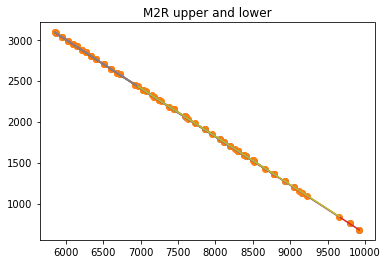

In [64]:
plt.title("M2R upper and lower")
plt.plot(m2r_0_wave_l, m2r_0_pix_l)
plt.plot(m2r_1_wave_l, m2r_1_pix_l)
plt.plot(m2r_2_wave_l, m2r_2_pix_l)
plt.plot(m2r_3_wave_l, m2r_3_pix_l)
plt.plot(m2r_4_wave_l, m2r_4_pix_l)
plt.plot(m2r_0_wave_u, m2r_0_pix_u)
plt.plot(m2r_1_wave_u, m2r_1_pix_u)
plt.plot(m2r_2_wave_u, m2r_2_pix_u)
plt.scatter(m2r_3_wave_u, m2r_3_pix_u)
plt.plot(m2r_4_wave_u, m2r_4_pix_u)
plt.scatter(m2r_total_wave_u, m2r_total_pix_u)

In [65]:
# sorting lists by pixel once they are all added together to make smooth line
def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    wave = [x for _, x in sorted(zipped_pairs)]
    pix = sorted(list2)
     
    return wave, pix

In [66]:
m2b_total_wave_u_s, m2b_total_pix_u_s = sort_list(m2b_total_wave_u, m2b_total_pix_u)
m1b_total_wave_u_s, m1b_total_pix_u_s = sort_list(m1b_total_wave_u, m1b_total_pix_u)
m2b_total_wave_l_s, m2b_total_pix_l_s = sort_list(m2b_total_wave_l, m2b_total_pix_l)
m1b_total_wave_l_s, m1b_total_pix_l_s = sort_list(m1b_total_wave_l, m1b_total_pix_l)

In [67]:
m2r_total_wave_u_s, m2r_total_pix_u_s = sort_list(m2r_total_wave_u, m2r_total_pix_u)
m1r_total_wave_u_s, m1r_total_pix_u_s = sort_list(m1r_total_wave_u, m1r_total_pix_u)
m2r_total_wave_l_s, m2r_total_pix_l_s = sort_list(m2r_total_wave_l, m2r_total_pix_l)
m1r_total_wave_l_s, m1r_total_pix_l_s = sort_list(m1r_total_wave_l, m1r_total_pix_l)

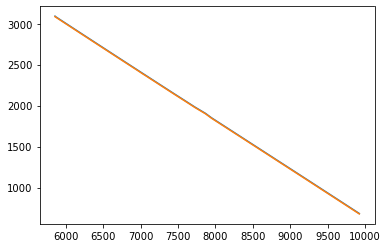

In [68]:
plt.plot(m2r_total_wave_u_s, m2r_total_pix_u_s)
plt.plot(m2r_total_wave_l_s, m2r_total_pix_l_s)

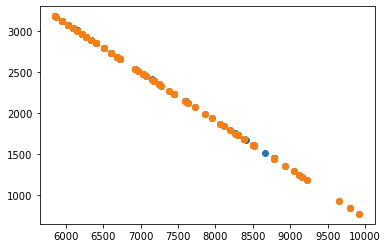

In [69]:
plt.scatter(m1r_total_wave_u_s, m1r_total_pix_u_s)
plt.scatter(m1r_total_wave_l_s, m1r_total_pix_l_s)

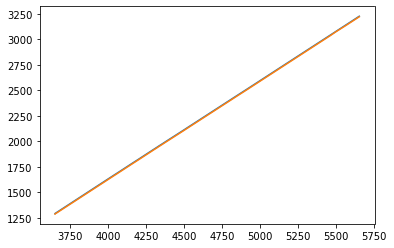

In [70]:
plt.plot(m2b_total_wave_u_s, m2b_total_pix_u_s)
plt.plot(m2b_total_wave_l_s, m2b_total_pix_l_s)

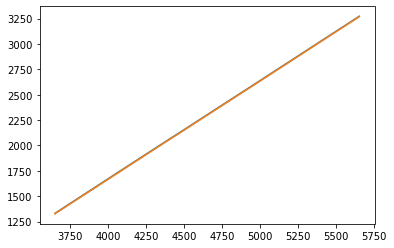

In [71]:
plt.plot(m1b_total_wave_u_s, m1b_total_pix_u_s)
plt.plot(m1b_total_wave_l_s, m1b_total_pix_l_s)

In [72]:
# cross-validation function
def cross_validation(splity, splitx):
    pbar = []
    stdev = []
    for j in np.arange(1,11):
        res_list = []
        
        for i in range(len(splity)):
            resty = splity[:i] + splity[i+1:]
            restx = splitx[:i] + splitx[i+1:]

            flattened_list_y = [y for x in resty for y in x]
            flattened_list_x = [y for x in restx for y in x]

            coeffs = chebyshev.chebfit(np.array(flattened_list_x)[np.logical_not(np.isnan(flattened_list_y))],
                                       np.array(flattened_list_y)[np.logical_not(np.isnan(flattened_list_y))] ,deg=j)
            
            fit = chebyshev.chebval(splitx[i],coeffs)
            res = (np.nansum(splity[i]-fit))**2/np.count_nonzero(~np.isnan(flattened_list_y))
        
            res_list.append(res)
        
        pbar.append(sum(res_list)/len(splity))
        stdev_residuals = 1.4826*np.median(np.abs(res_list - np.nanmedian(res_list)))
        stdev.append(stdev_residuals)
        
    return pbar, stdev   

In [73]:
# cross-validation, normalizing the result by the number of points
def cross_validation_norm(splity, splitx):
    pbar = []
    stdev = []
    for j in np.arange(1,11):
        res_list = []
        
        resty = splity[1:]
        restx = splitx[1:]

        flattened_list_y = [y for x in resty for y in x]
        flattened_list_x = [y for x in restx for y in x]

        coeffs = chebyshev.chebfit(np.array(flattened_list_x)[np.logical_not(np.isnan(flattened_list_y))],
                                   np.array(flattened_list_y)[np.logical_not(np.isnan(flattened_list_y))] ,deg=j)

        fit = chebyshev.chebval(splitx[0],coeffs)
        res = (np.nansum(splity[0]-fit))**2/np.count_nonzero(~np.isnan(flattened_list_y))

        res_list.append(res)
        
        pbar.append(sum(res_list)/len(splity[0]))
        stdev_residuals = 1.4826*np.median(np.abs(res_list - np.nanmedian(res_list)))
        stdev.append(stdev_residuals)
        
    return pbar, stdev   

In [74]:
# cross-validation to fit the wavelength-pixel relation
m1b_total_wave_l_s_split = np.array_split(np.array(m1b_total_wave_l_s),6)
m1b_total_pix_l_s_split = np.array_split(np.array(m1b_total_pix_l_s),6)

In [75]:
m1b_total_wave_u_s_split = np.array_split(np.array(m1b_total_wave_u_s),6)
m1b_total_pix_u_s_split = np.array_split(np.array(m1b_total_pix_u_s),6)

In [76]:
m2b_total_wave_l_s_split = np.array_split(np.array(m2b_total_wave_l_s),6)
m2b_total_pix_l_s_split = np.array_split(np.array(m2b_total_pix_l_s),6)

In [77]:
m2b_total_wave_u_s_split = np.array_split(np.array(m2b_total_wave_u_s),6)
m2b_total_pix_u_s_split = np.array_split(np.array(m2b_total_pix_u_s),6)

In [78]:
m1r_total_wave_l_s_split = np.array_split(np.array(m1r_total_wave_l_s),6)
m1r_total_pix_l_s_split = np.array_split(np.array(m1r_total_pix_l_s),6)
m1r_total_wave_u_s_split = np.array_split(np.array(m1r_total_wave_u_s),6)
m1r_total_pix_u_s_split = np.array_split(np.array(m1r_total_pix_u_s),6)
m2r_total_wave_l_s_split = np.array_split(np.array(m2r_total_wave_l_s),6)
m2r_total_pix_l_s_split = np.array_split(np.array(m2r_total_pix_l_s),6)
m2r_total_wave_u_s_split = np.array_split(np.array(m2r_total_wave_u_s),6)
m2r_total_pix_u_s_split = np.array_split(np.array(m2r_total_pix_u_s),6)

In [118]:
#pbar_m1b_l,stdev_m1b_l = cross_validation(m1b_total_wave_l_s_split, m1b_total_pix_l_s_split)
#pbar_m1b_u,stdev_m1b_u = cross_validation(m1b_total_wave_u_s_split, m1b_total_pix_u_s_split)
#pbar_m2b_l,stdev_m1b_l = cross_validation(m2b_total_wave_l_s_split, m2b_total_pix_l_s_split)
#pbar_m2b_u,stdev_m1b_u = cross_validation(m2b_total_wave_u_s_split, m2b_total_pix_u_s_split)

In [119]:
pbar_m1b_l,stdev_m1b_l = cross_validation_norm(m1b_total_wave_l_s_split, m1b_total_pix_l_s_split)
pbar_m1b_u,stdev_m1b_u = cross_validation_norm(m1b_total_wave_u_s_split, m1b_total_pix_u_s_split)
pbar_m2b_l,stdev_m1b_l = cross_validation_norm(m2b_total_wave_l_s_split, m2b_total_pix_l_s_split)
pbar_m2b_u,stdev_m1b_u = cross_validation_norm(m2b_total_wave_u_s_split, m2b_total_pix_u_s_split)

In [120]:
#pbar_m1r_l,stdev_m1r_l = cross_validation(m1r_total_wave_l_s_split, m1r_total_pix_l_s_split)
#pbar_m1r_u,stdev_m1r_u = cross_validation(m1r_total_wave_u_s_split, m1r_total_pix_u_s_split)
#pbar_m2r_l,stdev_m1r_l = cross_validation(m2r_total_wave_l_s_split, m2r_total_pix_l_s_split)
#pbar_m2r_u,stdev_m1r_u = cross_validation(m2r_total_wave_u_s_split, m2r_total_pix_u_s_split)

In [121]:
pbar_m1r_l,stdev_m1r_l = cross_validation_norm(m1r_total_wave_l_s_split, m1r_total_pix_l_s_split)
pbar_m1r_u,stdev_m1r_u = cross_validation_norm(m1r_total_wave_u_s_split, m1r_total_pix_u_s_split)
pbar_m2r_l,stdev_m1r_l = cross_validation_norm(m2r_total_wave_l_s_split, m2r_total_pix_l_s_split)
pbar_m2r_u,stdev_m1r_u = cross_validation_norm(m2r_total_wave_u_s_split, m2r_total_pix_u_s_split)

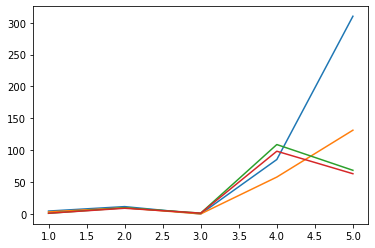

In [122]:
# best order - 3 for red instruments
plt.plot(np.arange(1,6), pbar_m1r_l[:5])
plt.plot(np.arange(1,6), pbar_m1r_u[:5])
plt.plot(np.arange(1,6), pbar_m2r_l[:5])
plt.plot(np.arange(1,6), pbar_m2r_u[:5])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

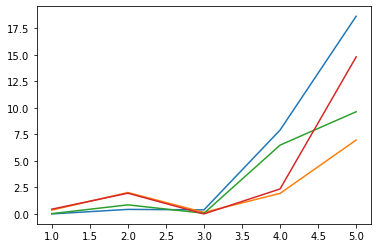

In [84]:
# best order - 3 for blue instruments
plt.plot(np.arange(1,6), pbar_m1b_l[:5])
plt.plot(np.arange(1,6), pbar_m1b_u[:5])
plt.plot(np.arange(1,6), pbar_m2b_l[:5])
plt.plot(np.arange(1,6), pbar_m2b_u[:5])
plt.show

In [85]:
# writing all of the wavelength-pixel results to file
df_m1b_u = pd.DataFrame()
df_m1b_u["Wavelength"] = m1b_total_wave_u_s
df_m1b_u["Pixel"] = m1b_total_pix_u_s
df_m1b_u.to_csv('m1b_u.csv', index=False)

In [86]:
df_m1b_l = pd.DataFrame()
df_m1b_l["Wavelength"] = m1b_total_wave_l_s
df_m1b_l["Pixel"] = m1b_total_pix_l_s
df_m1b_l.to_csv('m1b_l.csv', index=False)

In [87]:
df_m2b_l = pd.DataFrame()
df_m2b_l["Wavelength"] = m2b_total_wave_l_s
df_m2b_l["Pixel"] = m2b_total_pix_l_s
df_m2b_l.to_csv('m2b_l.csv', index=False)

In [88]:
df_m2b_u = pd.DataFrame()
df_m2b_u["Wavelength"] = m2b_total_wave_u_s
df_m2b_u["Pixel"] = m2b_total_pix_u_s
df_m2b_u.to_csv('m2b_u.csv', index=False)

In [89]:
df_m1r_u = pd.DataFrame()
df_m1r_u["Wavelength"] = m1r_total_wave_u_s
df_m1r_u["Pixel"] = m1r_total_pix_u_s
df_m1r_u.to_csv('m1r_u.csv', index=False)

In [90]:
df_m2r_u = pd.DataFrame()
df_m2r_u["Wavelength"] = m2r_total_wave_u_s
df_m2r_u["Pixel"] = m2r_total_pix_u_s
df_m2r_u.to_csv('m2r_u.csv', index=False)

In [91]:
df_m1r_l= pd.DataFrame()
df_m1r_l["Wavelength"] = m1r_total_wave_l_s
df_m1r_l["Pixel"] = m1r_total_pix_l_s
df_m1r_l.to_csv('m1r_l.csv', index=False)

In [92]:
df_m2r_l = pd.DataFrame()
df_m2r_l["Wavelength"] = m2r_total_wave_l_s
df_m2r_l["Pixel"] = m2r_total_pix_l_s
df_m2r_l.to_csv('m2r_l.csv', index=False)

In [93]:
# have three values for the same wavelength for the Ne + Hg[Ar] lamps, so average over these

In [94]:
df_m1b_u['Average'] = df_m1b_u.groupby('Wavelength')['Pixel'].transform('mean')
df_m1b_l['Average'] = df_m1b_l.groupby('Wavelength')['Pixel'].transform('mean')
df_m2b_u['Average'] = df_m2b_u.groupby('Wavelength')['Pixel'].transform('mean')
df_m2b_l['Average'] = df_m2b_l.groupby('Wavelength')['Pixel'].transform('mean')
df_m1r_u['Average'] = df_m1r_u.groupby('Wavelength')['Pixel'].transform('mean')
df_m1r_l['Average'] = df_m1r_l.groupby('Wavelength')['Pixel'].transform('mean')
df_m2r_u['Average'] = df_m2r_u.groupby('Wavelength')['Pixel'].transform('mean')
df_m2r_l['Average'] = df_m2r_l.groupby('Wavelength')['Pixel'].transform('mean')

In [97]:
df_m1b_u_avg = pd.DataFrame()
df_m1b_l_avg = pd.DataFrame()
df_m2b_u_avg = pd.DataFrame()
df_m2b_l_avg = pd.DataFrame()
df_m1r_u_avg = pd.DataFrame()
df_m1r_l_avg = pd.DataFrame()
df_m2r_u_avg = pd.DataFrame()
df_m2r_l_avg = pd.DataFrame()

In [98]:
df_m1b_u_avg['Wavelength'] = df_m1b_u['Wavelength']
df_m1b_l_avg['Wavelength'] = df_m1b_l['Wavelength']
df_m2b_u_avg['Wavelength'] = df_m2b_u['Wavelength']
df_m2b_l_avg['Wavelength'] = df_m2b_l['Wavelength']
df_m1r_u_avg['Wavelength'] = df_m1r_u['Wavelength']
df_m1r_l_avg['Wavelength'] = df_m1r_l['Wavelength']
df_m2r_u_avg['Wavelength'] = df_m2r_u['Wavelength']
df_m2r_l_avg['Wavelength'] = df_m2r_l['Wavelength']

In [99]:
df_m1b_u_avg['Pixel'] = df_m1b_u['Average']
df_m1b_l_avg['Pixel'] = df_m1b_l['Average']
df_m2b_u_avg['Pixel'] = df_m2b_u['Average']
df_m2b_l_avg['Pixel'] = df_m2b_l['Average']
df_m1r_u_avg['Pixel'] = df_m1r_u['Average']
df_m1r_l_avg['Pixel'] = df_m1r_l['Average']
df_m2r_u_avg['Pixel'] = df_m2r_u['Average']
df_m2r_l_avg['Pixel'] = df_m2r_l['Average']

In [100]:
df_m1b_u_avg = df_m1b_u_avg.drop_duplicates()
df_m1b_l_avg = df_m1b_l_avg.drop_duplicates()
df_m2b_u_avg = df_m2b_u_avg.drop_duplicates()
df_m2b_l_avg = df_m2b_l_avg.drop_duplicates()
df_m1r_u_avg = df_m1r_u_avg.drop_duplicates()
df_m1r_l_avg = df_m1r_l_avg.drop_duplicates()
df_m2r_u_avg = df_m2r_u_avg.drop_duplicates()
df_m2r_l_avg = df_m2r_l_avg.drop_duplicates()

In [115]:
m1b_total_wave_u_s_avg = np.array(df_m1b_u_avg["Wavelength"])
m1b_total_pix_u_s_avg = np.array(df_m1b_u_avg["Pixel"])
m1b_total_wave_l_s_avg = np.array(df_m1b_l_avg["Wavelength"])
m1b_total_pix_l_s_avg = np.array(df_m1b_l_avg["Pixel"])
m2b_total_wave_u_s_avg = np.array(df_m2b_u_avg["Wavelength"])
m2b_total_pix_u_s_avg = np.array(df_m2b_u_avg["Pixel"])
m2b_total_wave_l_s_avg = np.array(df_m2b_l_avg["Wavelength"])
m2b_total_pix_l_s_avg = np.array(df_m2b_l_avg["Pixel"])
m1r_total_wave_u_s_avg = np.array(df_m1r_u_avg["Wavelength"])
m1r_total_pix_u_s_avg = np.array(df_m1r_u_avg["Pixel"])
m1r_total_wave_l_s_avg = np.array(df_m1r_l_avg["Wavelength"])
m1r_total_pix_l_s_avg = np.array(df_m1r_l_avg["Pixel"])
m2r_total_wave_u_s_avg = np.array(df_m2r_u_avg["Wavelength"])
m2r_total_pix_u_s_avg = np.array(df_m2r_u_avg["Pixel"])
m2r_total_wave_l_s_avg = np.array(df_m2r_l_avg["Wavelength"])
m2r_total_pix_l_s_avg = np.array(df_m2r_l_avg["Pixel"])

In [150]:
m1b_total_wave_u_s_avg_split = np.array_split(np.array(m1b_total_wave_u_s_avg),6)
m1b_total_pix_u_s_avg_split = np.array_split(np.array(m1b_total_pix_u_s_avg),6)
m1b_total_wave_l_s_avg_split = np.array_split(np.array(m1b_total_wave_l_s_avg),6)
m1b_total_pix_l_s_avg_split = np.array_split(np.array(m1b_total_pix_l_s_avg),6)
m2b_total_wave_u_s_avg_split = np.array_split(np.array(m2b_total_wave_u_s_avg),6)
m2b_total_pix_u_s_avg_split = np.array_split(np.array(m2b_total_pix_u_s_avg),6)
m2b_total_wave_l_s_avg_split = np.array_split(np.array(m2b_total_wave_l_s_avg),6)
m2b_total_pix_l_s_avg_split = np.array_split(np.array(m2b_total_pix_l_s_avg),6)

In [151]:
m1r_total_wave_u_s_avg_split = np.array_split(np.array(m1r_total_wave_u_s_avg),6)
m1r_total_pix_u_s_avg_split = np.array_split(np.array(m1r_total_pix_u_s_avg),6)
m1r_total_wave_l_s_avg_split = np.array_split(np.array(m1r_total_wave_l_s_avg),6)
m1r_total_pix_l_s_avg_split = np.array_split(np.array(m1r_total_pix_l_s_avg),6)
m2r_total_wave_u_s_avg_split = np.array_split(np.array(m2r_total_wave_u_s_avg),6)
m2r_total_pix_u_s_avg_split = np.array_split(np.array(m2r_total_pix_u_s_avg),6)
m2r_total_wave_l_s_avg_split = np.array_split(np.array(m2r_total_wave_l_s_avg),6)
m2r_total_pix_l_s_avg_split = np.array_split(np.array(m2r_total_pix_l_s_avg),6)

In [152]:
pbar_m1b_l_avg,stdev_m1b_l_avg = cross_validation_norm(m1b_total_wave_l_s_avg_split, m1b_total_pix_l_s_avg_split)
pbar_m1b_u_avg,stdev_m1b_u_avg = cross_validation_norm(m1b_total_wave_u_s_avg_split, m1b_total_pix_u_s_avg_split)
pbar_m2b_l_avg,stdev_m2b_l_avg = cross_validation_norm(m2b_total_wave_l_s_avg_split, m2b_total_pix_l_s_avg_split)
pbar_m2b_u_avg,stdev_m2b_u_avg = cross_validation_norm(m2b_total_wave_u_s_avg_split, m2b_total_pix_u_s_avg_split)

In [153]:
pbar_m1r_l_avg,stdev_m1r_l_avg = cross_validation_norm(m1r_total_wave_l_s_avg_split, m1r_total_pix_l_s_avg_split)
pbar_m1r_u_avg,stdev_m1r_u_avg = cross_validation_norm(m1r_total_wave_u_s_avg_split, m1r_total_pix_u_s_avg_split)
pbar_m2r_l_avg,stdev_m2r_l_avg = cross_validation_norm(m2r_total_wave_l_s_avg_split, m2r_total_pix_l_s_avg_split)
pbar_m2r_u_avg,stdev_m2r_u_avg = cross_validation_norm(m2r_total_wave_u_s_avg_split, m2r_total_pix_u_s_avg_split)

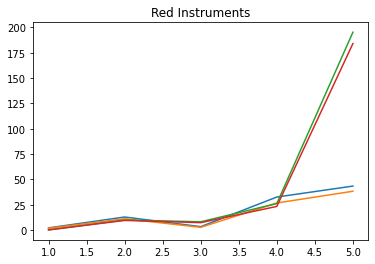

In [154]:
# best order - 3 for red instruments
plt.title("Red Instruments")
plt.plot(np.arange(1,6), pbar_m1r_l_avg[:5])
plt.plot(np.arange(1,6), pbar_m1r_u_avg[:5])
plt.plot(np.arange(1,6), pbar_m2r_l_avg[:5])
plt.plot(np.arange(1,6), pbar_m2r_u_avg[:5])
plt.show()

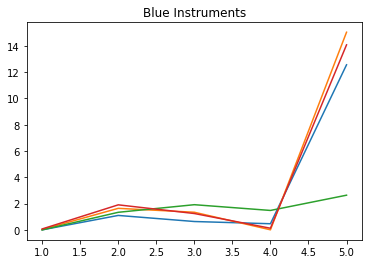

In [155]:
# best order - ? for blue instruments
plt.title("Blue Instruments")
plt.plot(np.arange(1,6), pbar_m1b_l_avg[:5])
plt.plot(np.arange(1,6), pbar_m1b_u_avg[:5])
plt.plot(np.arange(1,6), pbar_m2b_l_avg[:5])
plt.plot(np.arange(1,6), pbar_m2b_u_avg[:5])
plt.show()

In [156]:
df_m1b_u_avg.to_csv('m1b_u_avg.csv', index=False)
df_m1b_l_avg.to_csv('m1b_l_avg.csv', index=False)
df_m2b_u_avg.to_csv('m2b_u_avg.csv', index=False)
df_m2b_l_avg.to_csv('m2b_l_avg.csv', index=False)
df_m1r_u_avg.to_csv('m1r_u_avg.csv', index=False)
df_m1r_l_avg.to_csv('m1r_l_avg.csv', index=False)
df_m2r_u_avg.to_csv('m2r_u_avg.csv', index=False)
df_m2r_l_avg.to_csv('m2r_l_avg.csv', index=False)